In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

## Task 1
Load the information about the loan applications. List the names of the customers who should be approved for the loan application, based on the decision tree shown.

<center><img src="../misc/images/simple-tree.png" width="440" height="440"/> <center/>

In [4]:
bank_data = pd.read_csv('../datasets/credit_scoring.csv', low_memory=False)
res = bank_data.loc[((bank_data['Возраст'] >= 18) & (bank_data['Месячный доход' ] > 10000))]
res

,Имя,Возраст,Месячный доход
1,Ольга,43,12000
4,Петр,21,20000


## Task 2
Load the classic dataset of the iris classification Draw a scatterplot in the coordinates "Sepal length" / "Petal length", the color of the marker should show the type of iris. Be sure to add a legend for the markers.

<Axes: xlabel='sepal_len', ylabel='petal_len'>

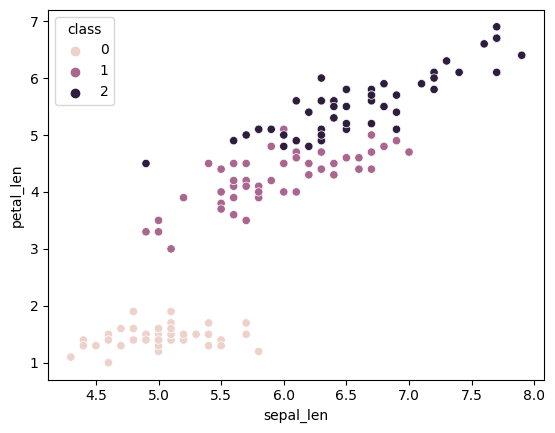

In [22]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data['class']=iris.target
iris_data.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_data.dropna(how="all", inplace=True) # remove any empty lines
sns.scatterplot(data=iris_data, x="sepal_len", y="petal_len", hue = "class")

## Task 3
Split dataset into training and test dataset with parameters test_size=0.2, random_state=42 Using only "Tepal length" and "Petal length" attributes, train a decision tree with tree depth 2. Calculate the classification accuracy and round it to 3 decimal places.

In [6]:
X = iris_data[['sepal_len', 'petal_len']]
y = iris_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

iris_class = tree.DecisionTreeClassifier(max_depth=2)
iris_class.fit(X_train, y_train)

print(f'{iris_class.score(X_test, y_test):.3f}')

0.967


## Task 4
Build a dividing surface according to the features "Sepal length" and "Petal length". Also draw the tree that results from teaching the model. Write how many leaves the resulting tree has.

Text(0, 0.5, 'Sepal length')

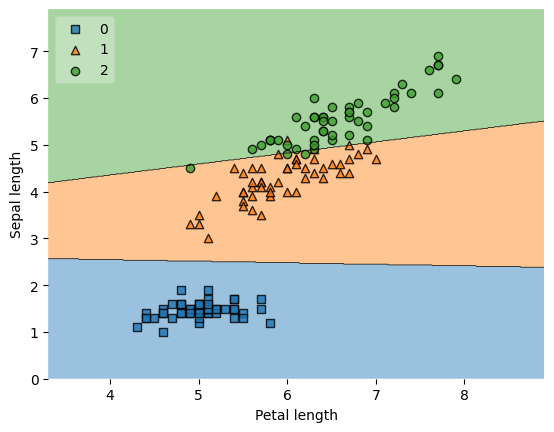

In [7]:
X = iris.data[:, [0, 2]]
Y = iris.target

iris_class = tree.DecisionTreeClassifier(max_depth = 2)
iris_class.fit(X, Y)

svm = SVC(C=0.5, kernel='linear')
svm.fit(X, Y)

plot_decision_regions(X, Y, clf=svm, legend=2)
plt.xlabel('Petal length')
plt.ylabel('Sepal length')

#tree.plot_tree(iris_class, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)

The resulting tree has three leaves

## Task 5
Generate a sinusoidal signal with a small noise of 250 samples. Divide the dataset into a training dataset and a test dataset with parameters test_size=0.2, random_state=42. Train a decision tree to predict a sinusoidal signal with a tree depth of 1. Construct a graph of the true responses and predictions of the model.

Text(0, 0.5, 'Предсказания модели')

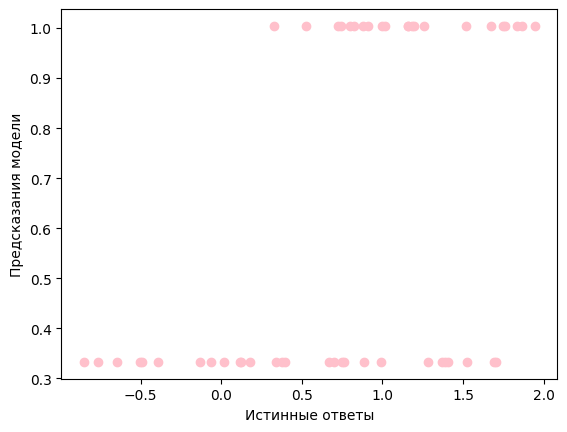

In [8]:
def generate_sin(sample_size, n = 1):
    np.random.seed(42)
    X = np.random.random((sample_size, n)) * 3
    coeffs = 1 + 2 * np.random.random((n, 1))
    y = np.sin(np.matmul(X*X, coeffs)) + np.random.random((sample_size, 1))
    return X, y

X = generate_sin(250)[0]
y = generate_sin(250)[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sin_signal = DecisionTreeRegressor(max_depth=1)
sin_signal.fit(X_train, y_train)

plt.scatter(y_test, sin_signal.predict(X_test), color='pink')
plt.xlabel("Истинные ответы")
plt.ylabel("Предсказания модели")

## Task 6
Calculate the mean square error (MSE) of the prediction on the test sample. Plot MSE as a function of tree depth (from 1 to 30). Write the tree depth at which the quality of the model is best.

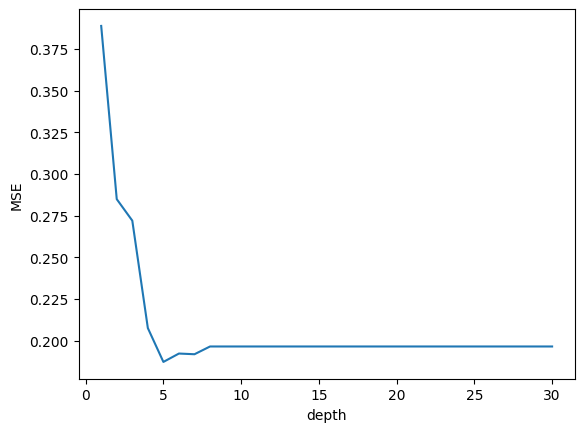

In [9]:
X = iris_data[['sepal_len', 'petal_len']]
y = iris_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

result_df = pd.DataFrame(({'depth': [], 'MSE': []}))
length = 0

for depth in range(1, 31):
    tree_cl = DecisionTreeClassifier(max_depth = depth)
    tree_cl.fit(X_train, y_train)
    predict = tree_cl.predict(X_test)
    extracted_MSEs = tree_cl.tree_.impurity
    mse = extracted_MSEs.mean()
    row = [depth, mse]
    result_df.loc[length] = row
    length += 1

graph = sns.lineplot(x='depth', y='MSE', data=result_df)

In [10]:
best_depth = np.argmin(result_df['MSE'], axis = 0, out=None) + 1
print(f"Глубина дерева, на котором MSE на тестовой выборке наилучший: {best_depth}")

Глубина дерева, на котором MSE на тестовой выборке наилучший: 5


## Task 7

Use BaggingRegressor from sklearn.ensemble to train several multiple decision trees with parameter max_depth=5.
Calculate the root-mean-square error (MSE) of the prediction for the test sample. Plot the graph of dependency of MSE on the number of basic models in BaggingRegressor with parameters bootstrap=True, random_state=42 (from 1 to 50).
Write the number of trees at which the quality of the model is best.

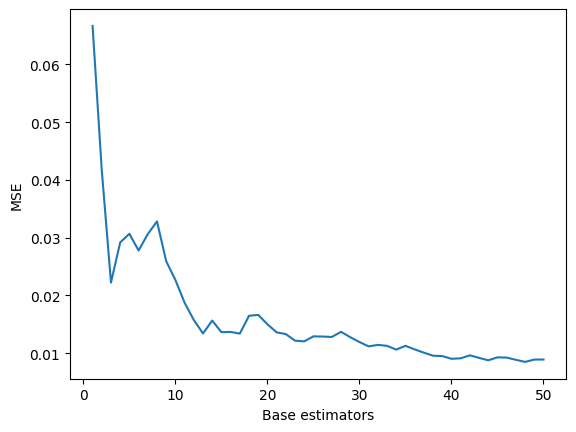

In [11]:
X = iris_data[['sepal_len', 'petal_len']]
y = iris_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_cl = DecisionTreeClassifier(max_depth = 5)

result_df = pd.DataFrame(({'Base estimators': [], 'MSE': []}))
length = 0

for base_estimators in range(1, 51):
    model = BaggingRegressor(estimator=tree_cl, n_estimators=base_estimators, bootstrap=True, random_state=42)
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    mse = mean_squared_error(y_test, predict)
    row = [base_estimators, mse]
    result_df.loc[length] = row
    length += 1

graph = sns.lineplot(x='Base estimators', y='MSE', data=result_df)

In [12]:
best_estm = np.argmin(result_df['MSE'], axis = 0, out=None) + 1
print(f"Количество деревьев решений, при котором MSE на тестовой выборке наилучший: {best_estm}")

Количество деревьев решений, при котором MSE на тестовой выборке наилучший: 48


## Task 8
Train Random Forest algorithm with parameters max_depth=5, n_estimators=100, max_features=1, random_state=42.
Calculate MSE on test sample and round it to 3 decimal places.

In [27]:
rand_f = RandomForestClassifier(max_depth = 5, n_estimators = 100, max_features = 1, random_state = 42)
rand_f.fit(X_train, y_train)
prediction = rand_f.predict(X_test)

mse = mean_squared_error(y_test, prediction)
round(mse,3)

0.0